In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Importing data

In [8]:
data=pd.read_csv('Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


Upper Confidence Bound 

In [40]:
import math
no_of_rounds=500
no_of_ads=10
best_ad=[]
no_time_ad_selected= [0] * no_of_ads
no_time_ad_viewed= [0] * no_of_ads


for n in range(0,no_of_rounds):
    ad_best=0
    max_upper_confidence=0
    #Calculate upper confidence bound of each ad after round n
    for i in range(0,no_of_ads):
        if (no_time_ad_selected[i])>0:
            avg=no_time_ad_viewed[i]/no_time_ad_selected[i]
            delta=math.sqrt(3/2*math.log(n+1)/no_time_ad_selected[i])
            upper_confidence=avg+delta

        else:
            upper_confidence=1e200

        if upper_confidence>max_upper_confidence:
            ad_best=i
            max_upper_confidence=upper_confidence

    best_ad.append(ad_best)
    no_time_ad_selected[ad_best]+=1
    no_time_ad_viewed[ad_best]=no_time_ad_viewed[ad_best]+data.values[n, ad_best]

Result through Histogram

No handles with labels found to put in legend.


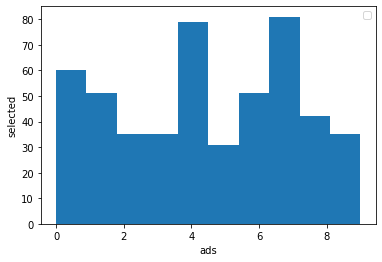

In [44]:
plt.hist(best_ad)
plt.xlabel('ads')
plt.ylabel('selected')
plt.legend()
plt.show()